Starting with reviews-comp/reviews_553850.csv


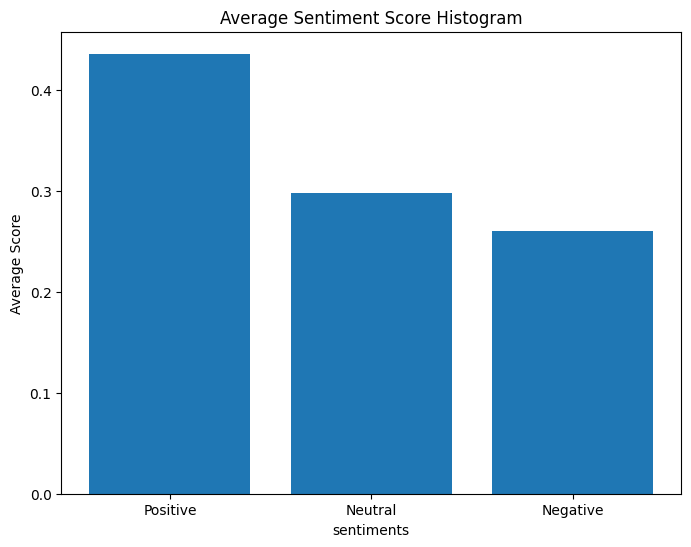

Starting with reviews-comp/reviews_271590.csv


/tmp/ipykernel_3072663/1069727592.py:21: DtypeWarning: Columns (0,1,5,6,7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"{data_folder}/{file}")


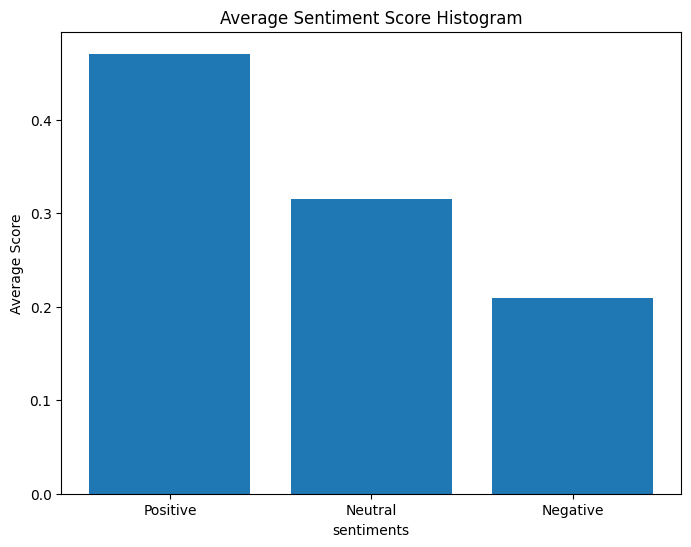

Starting with reviews-comp/reviews_2420110.csv


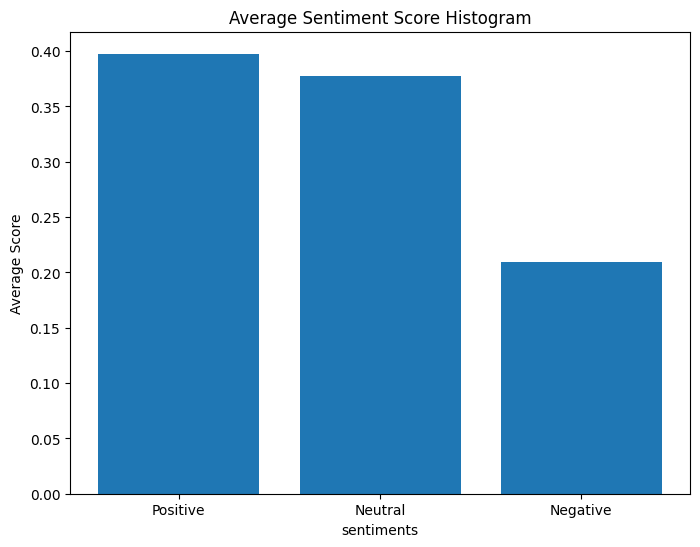

Starting with reviews-comp/reviews_1546990.csv


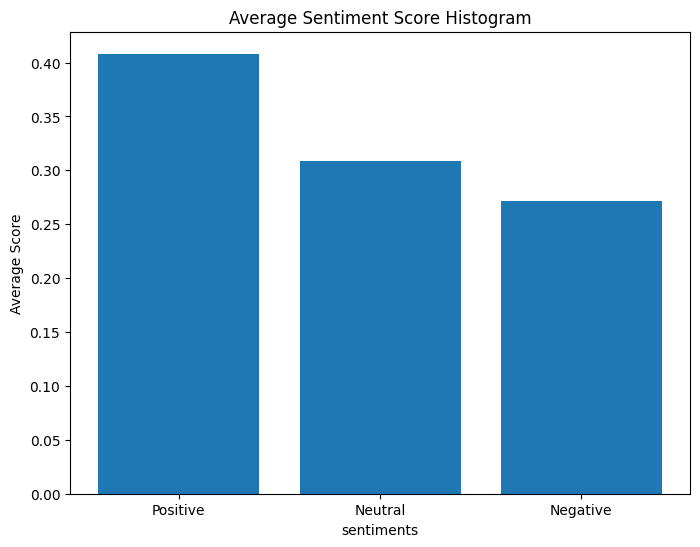

Starting with reviews-comp/reviews_49520.csv


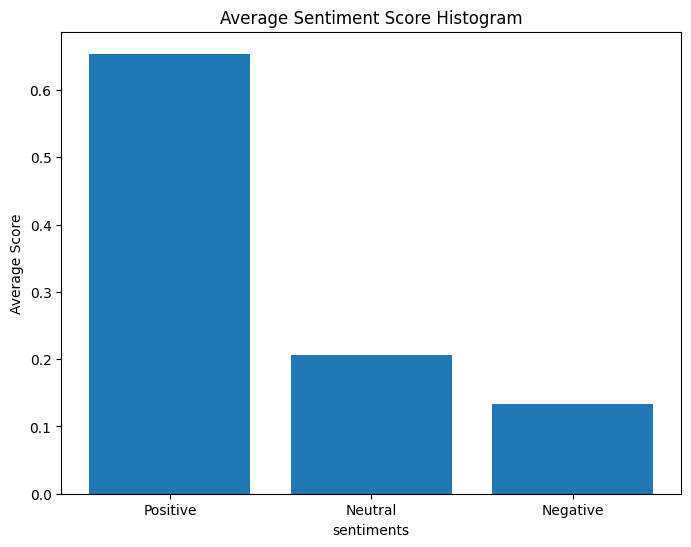

Starting with reviews-comp/reviews_409720.csv


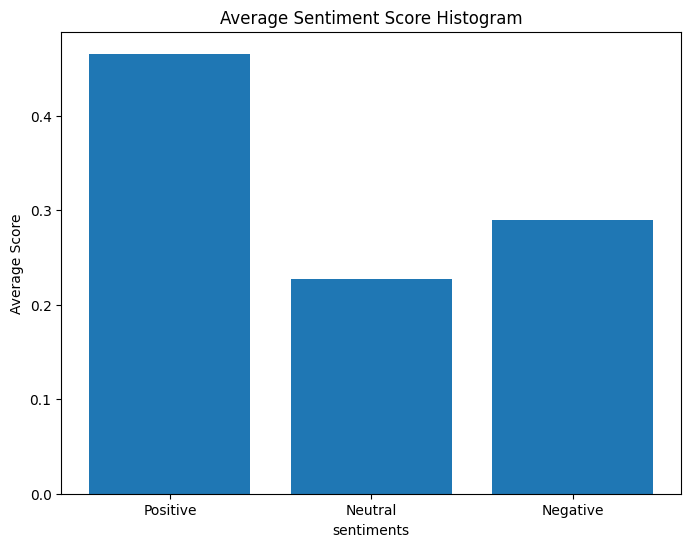

Starting with reviews-comp/reviews_1659420.csv


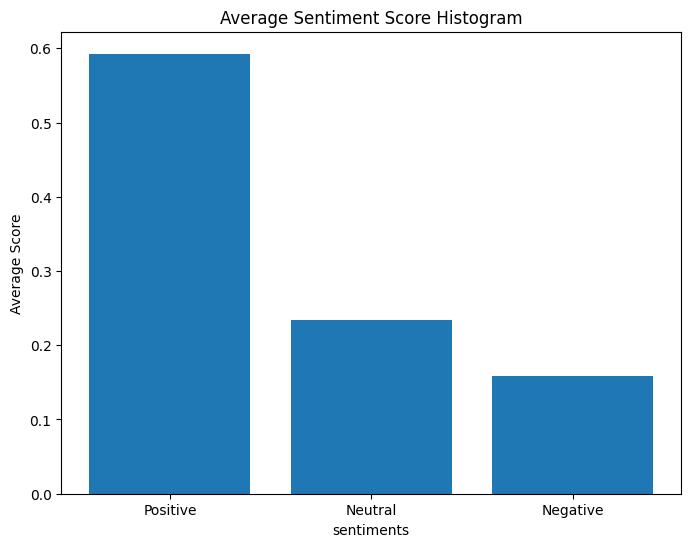

Starting with reviews-comp/reviews_2172010.csv


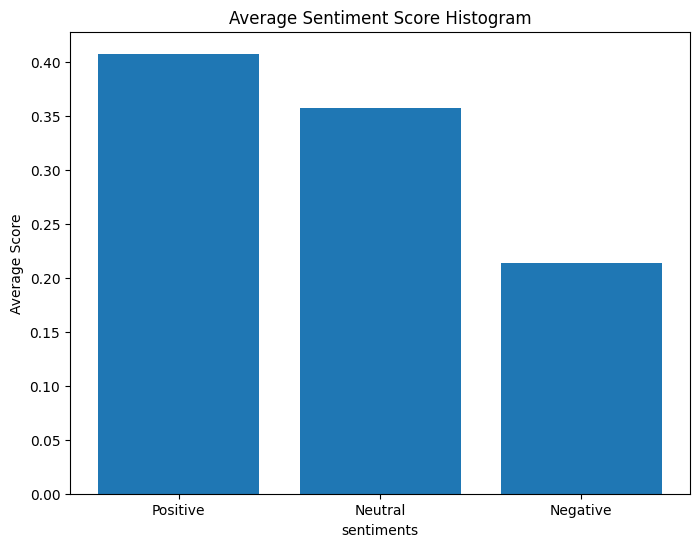

Starting with reviews-comp/reviews_1817190.csv


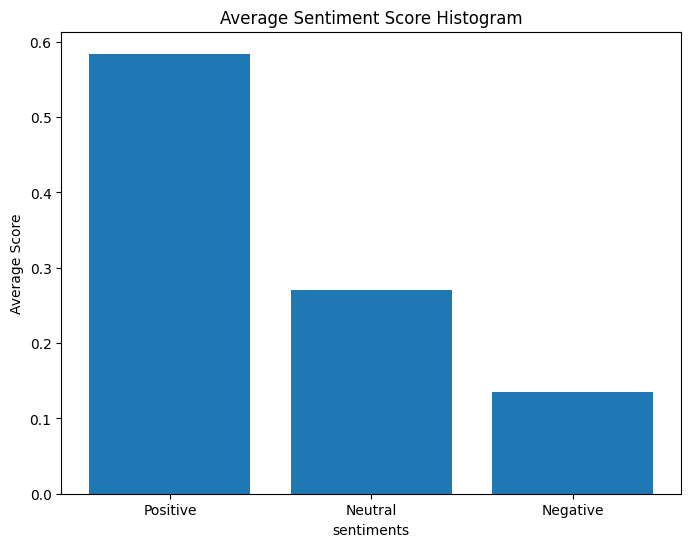

Starting with reviews-comp/reviews_2322010.csv


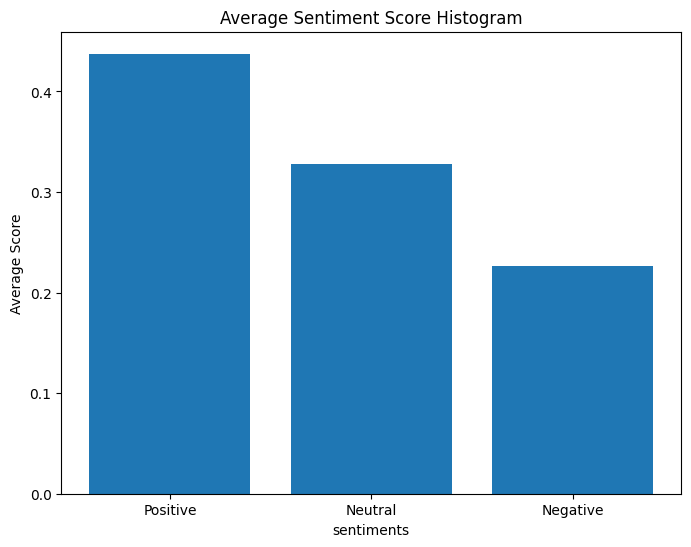

Starting with reviews-comp/reviews_1888930.csv


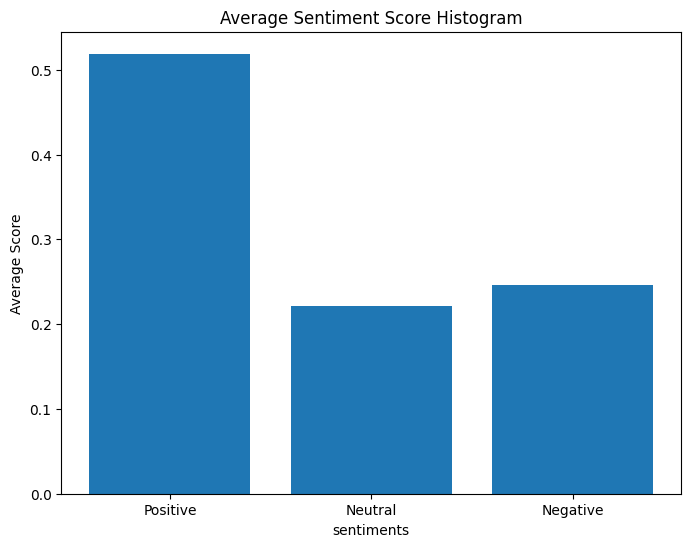

Starting with reviews-comp/reviews_2215430.csv


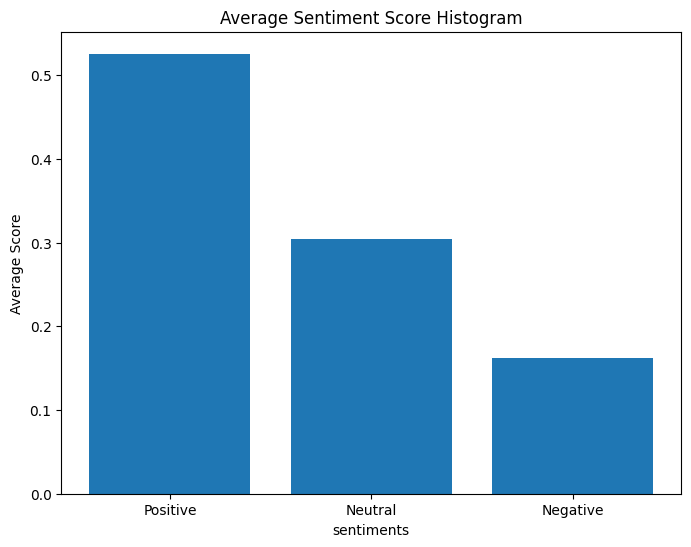

Starting with reviews-comp/reviews_1174180.csv


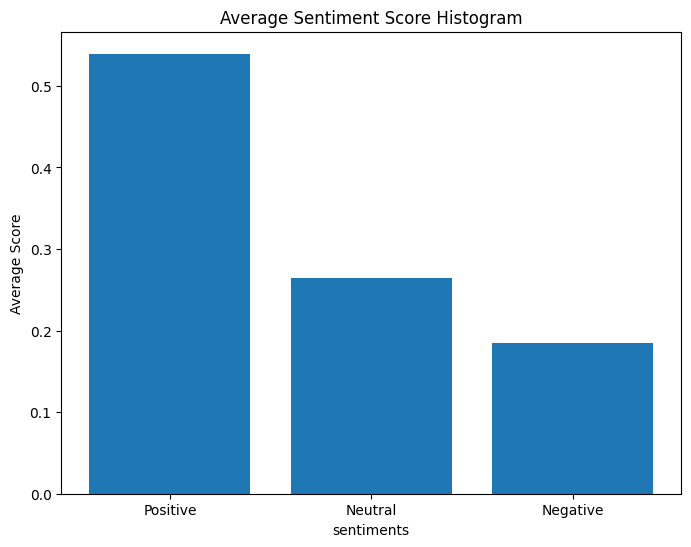

Starting with reviews-comp/reviews_409710.csv


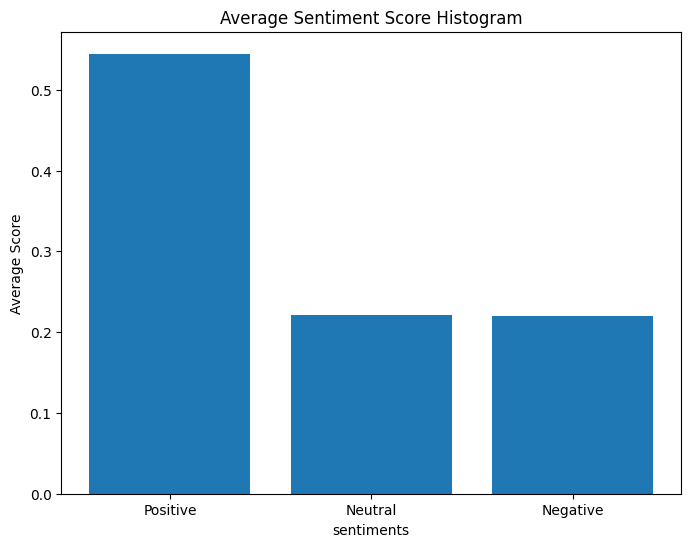

Starting with reviews-comp/reviews_1593500.csv


/tmp/ipykernel_3072663/1069727592.py:21: DtypeWarning: Columns (0,1,5,6,7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"{data_folder}/{file}")


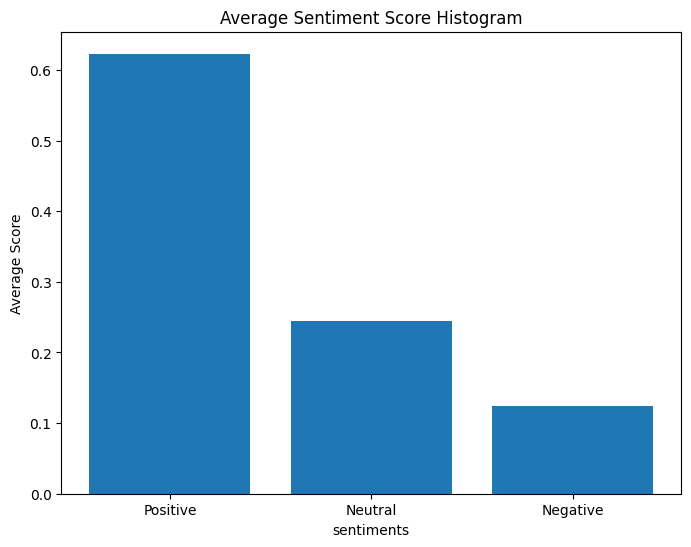

Starting with reviews-comp/reviews_729040.csv


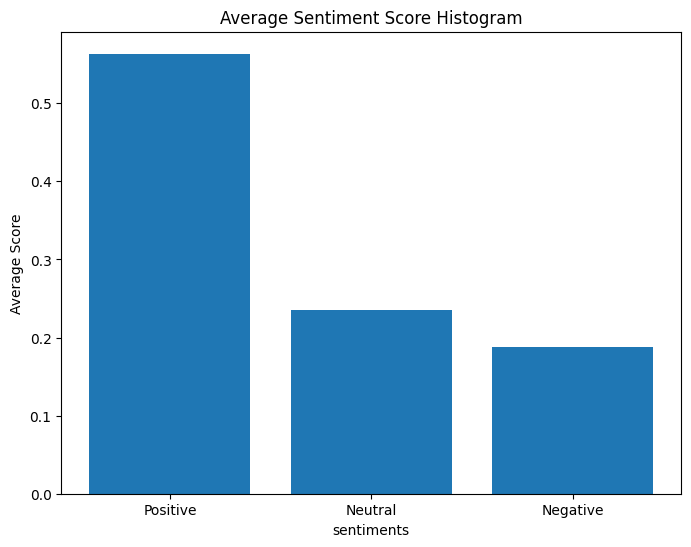

Starting with reviews-comp/reviews_1546970.csv


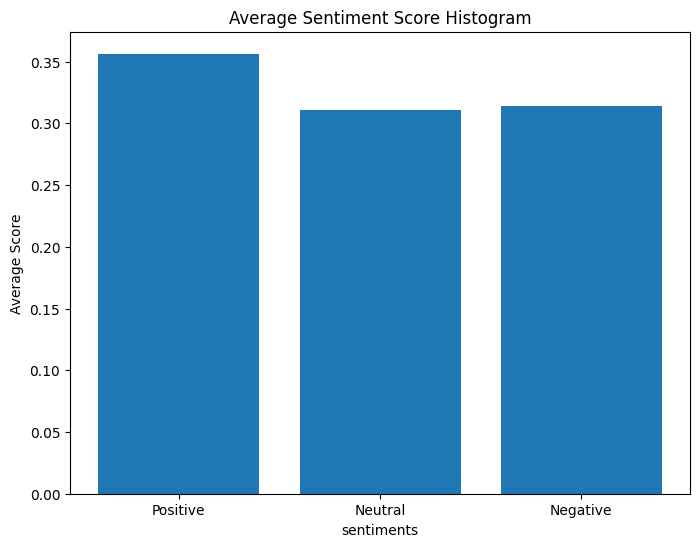

Starting with reviews-comp/reviews_1649240.csv


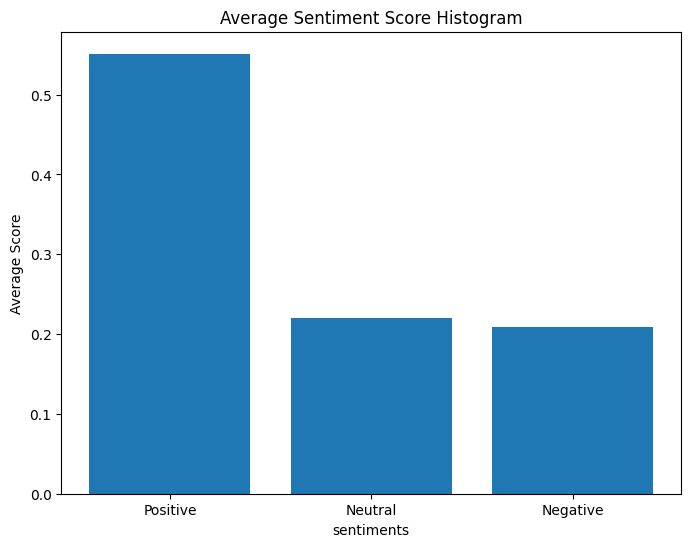

Starting with reviews-comp/reviews_8870.csv


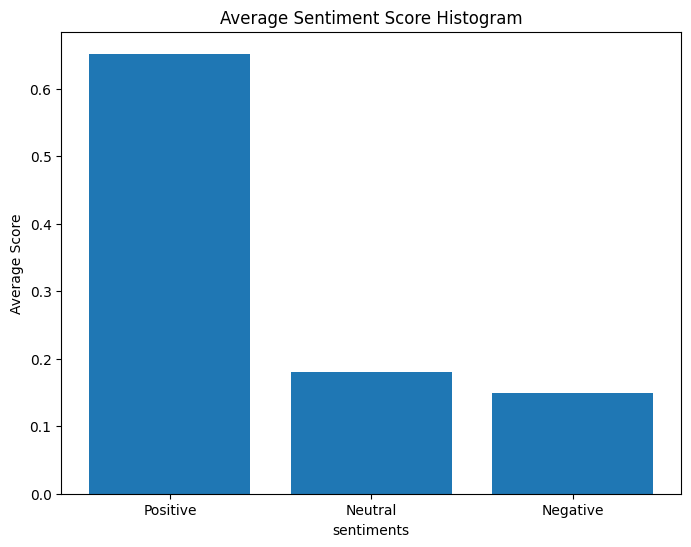

Starting with reviews-comp/reviews_261640.csv


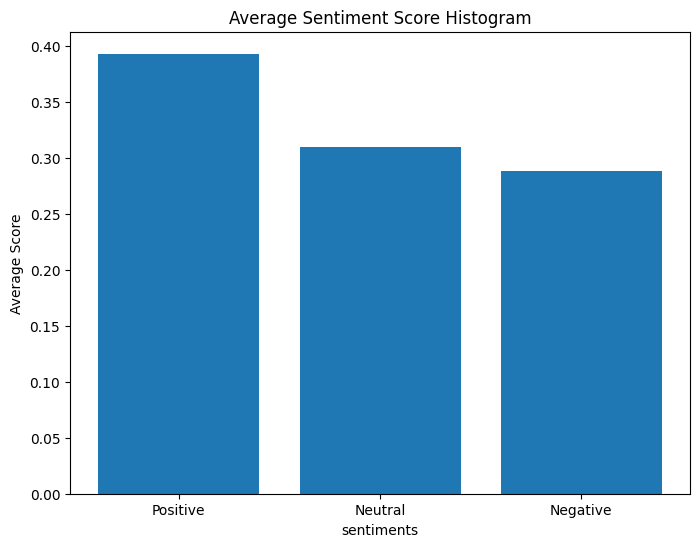

Starting with reviews-comp/reviews_1151640.csv


/tmp/ipykernel_3072663/1069727592.py:21: DtypeWarning: Columns (0,1,5,6,7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"{data_folder}/{file}")


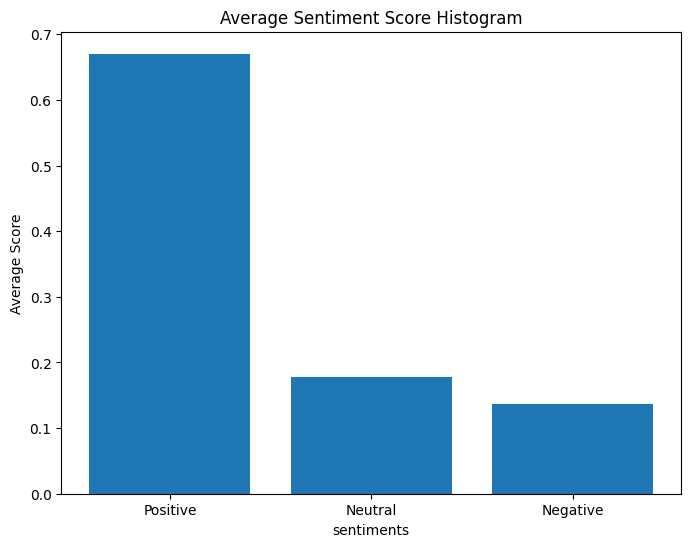

Starting with reviews-comp/reviews_1599660.csv


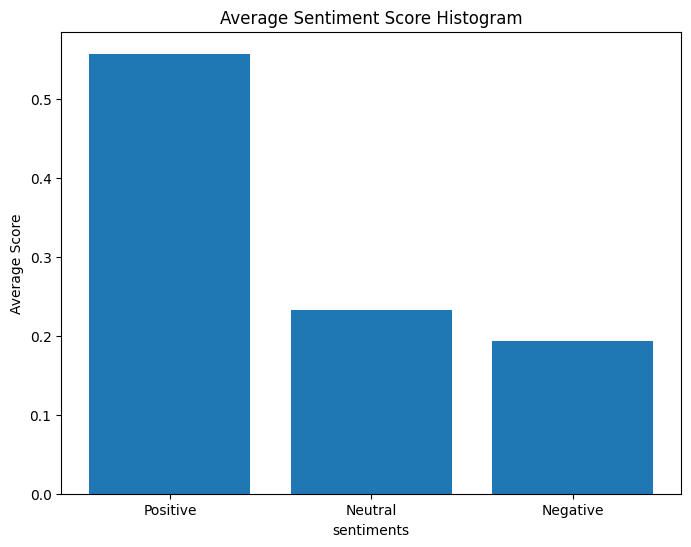

Starting with reviews-comp/reviews_1895880.csv


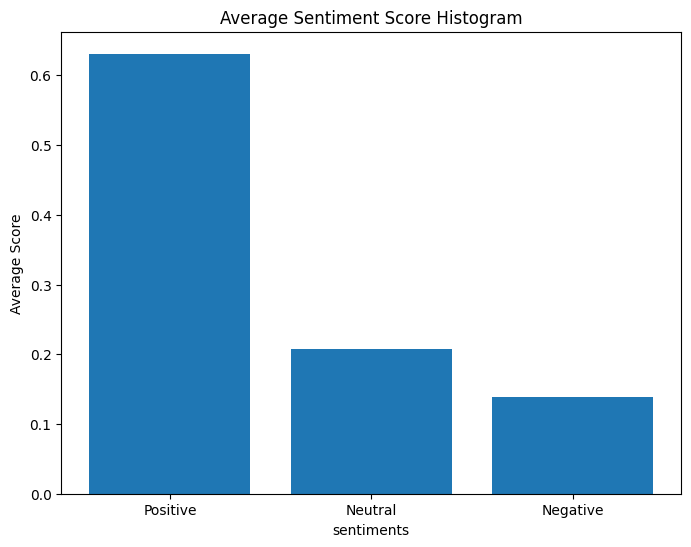

Starting with reviews-comp/reviews_397540.csv


/tmp/ipykernel_3072663/1069727592.py:21: DtypeWarning: Columns (0,1,5,6,7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"{data_folder}/{file}")


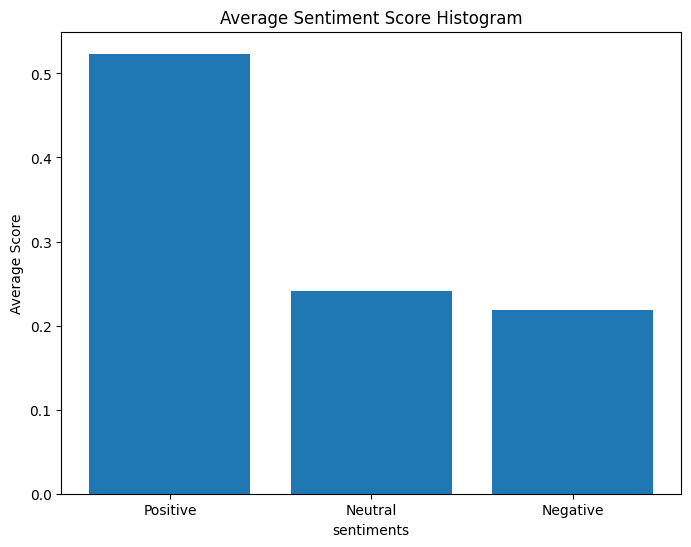

Starting with reviews-comp/reviews_1547000.csv


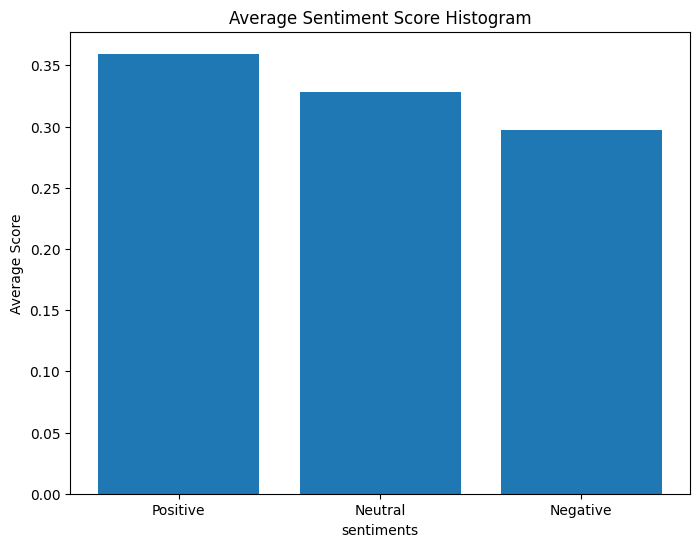

Starting with reviews-comp/reviews_2668510.csv


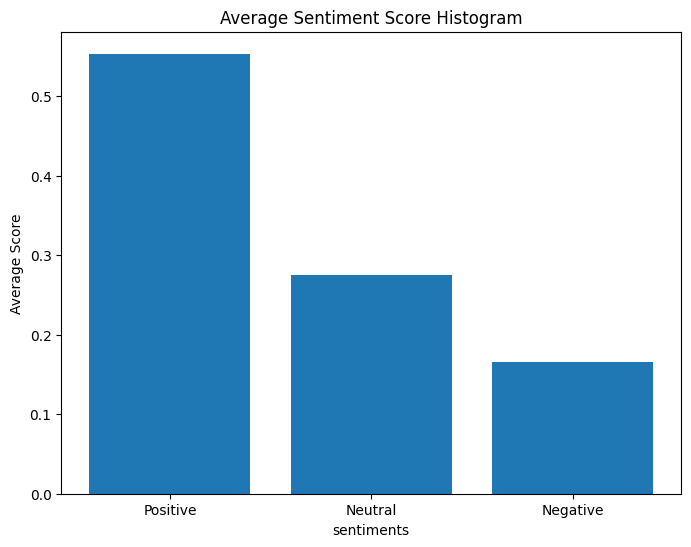

Starting with reviews-comp/reviews_1817070.csv


/tmp/ipykernel_3072663/1069727592.py:21: DtypeWarning: Columns (0,1,5,6,7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"{data_folder}/{file}")


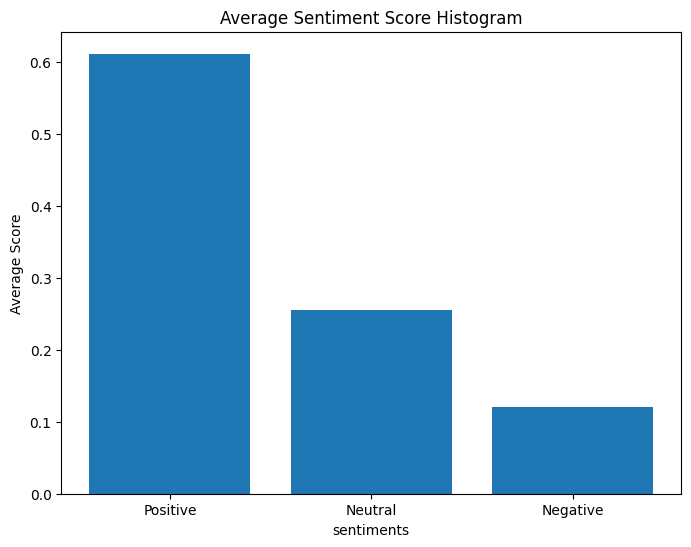

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  # To convert strings to dictionaries if the data is stored as a string
import os
import re

data_folder = "reviews-comp"

def getCSVs(folder) -> list[str]:
    return [f for f in os.listdir(folder) if f.endswith('.csv')]
# Function to clean up the 'sentiments' column by replacing np.float32 with regular floats
def clean_sentiment_string(sentiment_str):
    # Replace instances of 'np.float32(value)' with 'value'
    cleaned_str = re.sub(r'np\.float32\(([\d\.]+)\)', r'\1', sentiment_str)
    return cleaned_str

for file in getCSVs(data_folder):
    print(f"Starting with {data_folder}/{file}")
    # Load data
    #data = pd.read_csv(f"{data_folder}/{file}",encoding='iso-8859-1',low_memory=False)
    data = pd.read_csv(f"{data_folder}/{file}")

    data['sentiments'] = data['sentiment'].apply(lambda x: ast.literal_eval(clean_sentiment_string(x)) if isinstance(x, str) else x)

    # Convert 'sentiments' column from string to dictionary if needed
    #data['sentiment'] = data['sentiment'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Extract individual sentiment scores
    data['positive'] = data['sentiments'].apply(lambda x: x.get('positive', 0))
    data['neutral'] = data['sentiments'].apply(lambda x: x.get('neutral', 0))
    data['negative'] = data['sentiments'].apply(lambda x: x.get('negative', 0))

    # Calculate the average score for each sentiment across all rows
    average_sentiments = {
        'Positive': data['positive'].mean(),
        'Neutral': data['neutral'].mean(),
        'Negative': data['negative'].mean()
    }

    # Plotting the histogram (as a bar plot)
    plt.figure(figsize=(8, 6))
    plt.bar(average_sentiments.keys(), average_sentiments.values())
    plt.xlabel('sentiments')
    plt.ylabel('Average Score')
    plt.title('Average Sentiment Score Histogram')
    plt.show()